# Weather Patterns Recognition

## Forecasting MaxTemp of the Next Day using LSTM (Time Series)

In [82]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

In [83]:
# Load dataset
df = pd.read_csv("data/weatherAUS.csv")

In [84]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [85]:
# Convert Date column and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [86]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [87]:
city = "Sydney"
df_city = df[df['Location'] == city]

In [7]:
df_city

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [88]:
df_city.loc[:, 'MaxTemp'] = df_city['MaxTemp'].ffill()

In [89]:
df_city

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [90]:
# Drop if still NaNs
df_city = df_city.dropna(subset=['MaxTemp'])

In [91]:
# Scale MaxTemp
scaler = MinMaxScaler()
df_city['MaxTemp_scaled'] = scaler.fit_transform(df_city[['MaxTemp']])

In [92]:
df_city.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp_scaled
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,0.313783
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,0.407625
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,0.375367
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,0.325513
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,0.410557


In [93]:
# Create sequences
# Create windows where the X is historical data, and the y is the predicted value
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [94]:
window_size = 30
data = df_city['MaxTemp_scaled'].values
X, y = create_sequences(data, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [95]:
# Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [102]:
# Build LSTM
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
83/83 [==============================] - 2s 10ms/step - loss: 0.0182 - val_loss: 0.0100
Epoch 2/10
83/83 [==============================] - 1s 9ms/step - loss: 0.0084 - val_loss: 0.0093
Epoch 3/10
83/83 [==============================] - 1s 9ms/step - loss: 0.0082 - val_loss: 0.0095
Epoch 4/10
83/83 [==============================] - 1s 10ms/step - loss: 0.0082 - val_loss: 0.0092
Epoch 5/10
83/83 [==============================] - 1s 9ms/step - loss: 0.0082 - val_loss: 0.0095
Epoch 6/10
83/83 [==============================] - 1s 9ms/step - loss: 0.0081 - val_loss: 0.0092
Epoch 7/10
83/83 [==============================] - 1s 9ms/step - loss: 0.0081 - val_loss: 0.0089
Epoch 8/10
83/83 [==============================] - 1s 9ms/step - loss: 0.0082 - val_loss: 0.0090
Epoch 9/10
83/83 [==============================] - 1s 9ms/step - loss: 0.0081 - val_loss: 0.0088
Epoch 10/10
83/83 [==============================] - 1s 10ms/step - loss: 0.0080 - val_loss: 0.0089


In [101]:
# Clear previous session to avoid legacy config artifacts
from tensorflow.keras import backend as K
K.clear_session()


In [106]:
# Save model and scaler
os.makedirs("models", exist_ok=True)
# model.save("models/forecasting_lstm_model.keras")
model.save("models/forecasting_lstm_model", save_format="tf") 
joblib.dump(scaler, "models/max_temp_scaler.pkl")

INFO:tensorflow:Assets written to: models/forecasting_lstm_model/assets


['models/max_temp_scaler.pkl']

## Predict the next day MaxTemp

In [105]:
from tensorflow.keras.models import load_model

# Load model and scaler
# model = load_model("models/forecasting_lstm_model.h5")
model = load_model("models/forecasting_lstm_model")
scaler = joblib.load("models/max_temp_scaler.pkl")

# Use last 30 days from city data
last_30 = df_city['MaxTemp_scaled'].values[-30:]
last_30 = last_30.reshape((1, 30, 1))

# Predict and inverse scale
pred_scaled = model.predict(last_30)[0][0]
pred_temp = scaler.inverse_transform([[pred_scaled]])[0][0]

print(f"Predicted Max Temperature for tomorrow in {city}: {pred_temp:.2f} °C")


1/1 [==============================] - 0s 120ms/step
Predicted Max Temperature for tomorrow in Sydney: 19.16 °C


## Efficiency of the LSTM model

21/21 [==============================] - 0s 3ms/step
Model Performance Metrics:
Root Mean Square Error: 3.27°C
Mean Absolute Error: 2.30°C
R-squared Score: 0.499


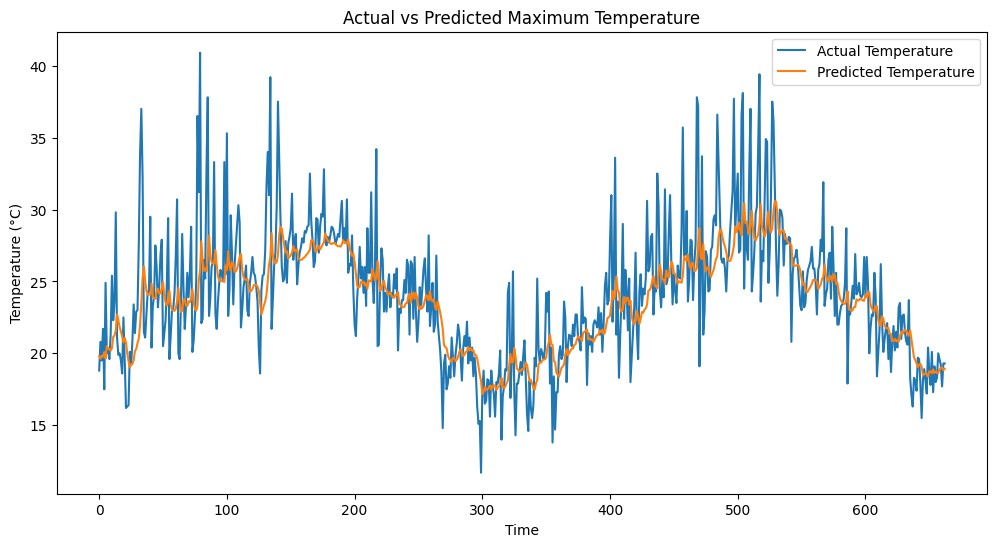

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate various metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print evaluation metrics
print(f"Model Performance Metrics:")
print(f"Root Mean Square Error: {rmse:.2f}°C")
print(f"Mean Absolute Error: {mae:.2f}°C")
print(f"R-squared Score: {r2:.3f}")

# Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title('Actual vs Predicted Maximum Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

## Predicting whehter it will rain tomorrow or not

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [34]:
# Load data
df = pd.read_csv("data/weatherAUS.csv")

# Drop rows with missing target
df = df.dropna(subset=["RainTomorrow"])

In [35]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [36]:
# Encode target variable
df["RainTomorrow"] = LabelEncoder().fit_transform(df["RainTomorrow"])  # Yes = 1, No = 0

In [37]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


In [38]:
# Select features
features = ["MinTemp", "MaxTemp", "Rainfall", "Humidity3pm", "Pressure9am", "WindGustSpeed"]
df = df.dropna(subset=features)

X = df[features]
y = df["RainTomorrow"]

In [39]:
X

,MinTemp,MaxTemp,Rainfall,Humidity3pm,Pressure9am,WindGustSpeed
0,13.4,22.9,0.6,22.0,1007.7,44.0
1,7.4,25.1,0.0,25.0,1010.6,44.0
2,12.9,25.7,0.0,30.0,1007.6,46.0
3,9.2,28.0,0.0,16.0,1017.6,24.0
4,17.5,32.3,1.0,33.0,1010.8,41.0
...,...,...,...,...,...,...
145454,3.5,21.8,0.0,27.0,1024.7,31.0
145455,2.8,23.4,0.0,24.0,1024.6,31.0
145456,3.6,25.3,0.0,21.0,1023.5,22.0
145457,5.4,26.9,0.0,24.0,1021.0,37.0


In [40]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 119941, dtype: int64

In [41]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
# Train the model
# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8474717578890325
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18831
           1       0.71      0.49      0.58      5158

    accuracy                           0.85     23989
   macro avg       0.79      0.72      0.74     23989
weighted avg       0.84      0.85      0.84     23989



In [46]:
# Save model and scaler
joblib.dump(clf, "models/classifier_rain_tomorrow.pkl")
joblib.dump(scaler, "models/classifier_scaler.pkl")

['models/classifier_scaler.pkl']

## Clustering – Group Cities by Weather Patterns


In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [48]:
# Load data
df = pd.read_csv("data/weatherAUS.csv")

# Group by Location and take mean of selected features
features = ["MinTemp", "MaxTemp", "Rainfall", "Humidity9am", "Humidity3pm", "Pressure9am"]
df_grouped = df.groupby("Location")[features].mean().dropna()

In [49]:
# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_grouped)

In [50]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_grouped["Cluster"] = kmeans.fit_predict(scaled_data)


In [51]:
# Save clustering model
joblib.dump(kmeans, "models/kmeans_weather.pkl")
joblib.dump(scaler, "models/cluster_scaler.pkl")

['models/cluster_scaler.pkl']

In [52]:
df_grouped.reset_index().to_csv("data/clustered_locations.csv", index=False)

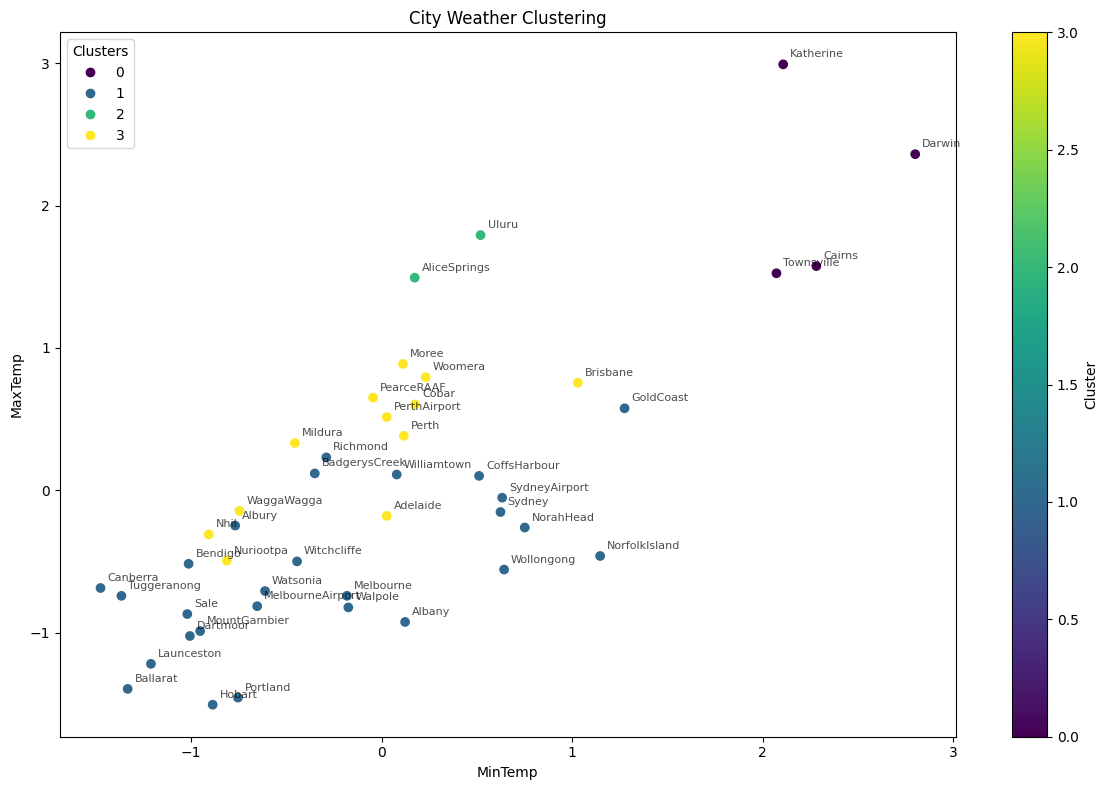

In [56]:
# Visualize with legends
plt.figure(figsize=(12, 8))  # Made figure larger to accommodate labels

# Create scatter plot
scatter = plt.scatter(scaled_data[:, 0], scaled_data[:, 1], 
                     c=df_grouped["Cluster"], 
                     cmap="viridis")

# Add city names as annotations
for idx, city in enumerate(df_grouped.index):
    plt.annotate(city,  # The text to add
                (scaled_data[idx, 0], scaled_data[idx, 1]),  # Point to label
                xytext=(5, 5),  # Text offset from point
                textcoords='offset points',  # How to interpret offset
                fontsize=8,  # Smaller font size for clarity
                alpha=0.7)  # Slight transparency for better readability

plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.title("City Weather Clustering")

# Add legend
legend = plt.legend(*scatter.legend_elements(),
                   title="Clusters",
                   loc="best")
plt.colorbar(scatter, label="Cluster")

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()

In [ ]:
""" Interpretation:
Cluster 0: Might be tropical cities (hot, humid)
Cluster 1: Might be temperate cities
Cluster 2: Might be coastal cities
Cluster 3: Might be cooler cities
This clustering helps identify cities with similar weather patterns, which can be useful for:
Climate zone identification
Weather pattern analysis
Regional weather forecasting
Climate change studies """